# Importing libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cab = pd.read_csv('DataSets/Cab_Data.csv')
customer = pd.read_csv('DataSets/Customer_ID.csv')
transaction = pd.read_csv('DataSets/Transaction_ID.csv')
weather = pd.read_csv('DataSets/Weather.csv')

# Dataset processing and merging

In [3]:
cab['Date'] = pd.to_datetime(cab['Date'])

In [4]:
# Changing column names for easier use

cab_cols = ['t_id', 'date', 'company', 'city', 'km', 'charged', 'cost']
customer_cols = ['customer_id', 'gender', 'age', 'income']
transaction_cols = ['t_id', 'customer_id', 'payment']

cab.columns = cab_cols
customer.columns = customer_cols
transaction.columns = transaction_cols

In [5]:
# Checking missing values

dfs = [cab, customer, transaction]
for df in dfs:
    print(df.isnull().sum(), '\n')

t_id       0
date       0
company    0
city       0
km         0
charged    0
cost       0
dtype: int64 

customer_id    0
gender         0
age            0
income         0
dtype: int64 

t_id           0
customer_id    0
payment        0
dtype: int64 



In [6]:
temp = pd.merge(cab,transaction,how='left',on='t_id')

##### The transaction dataset is merged onto the cab dataset, so that the customer id linked with the transaction details.

In [7]:
temp

,t_id,date,company,city,km,charged,cost,customer_id,payment
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card
...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-08-01,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash
359388,10440104,2018-04-01,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash
359389,10440105,2018-05-01,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash
359390,10440106,2018-05-01,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card


In [8]:
temp1 = pd.merge(temp, customer, how='left', on='customer_id')

##### This merge was done to have the customer details alongside each transaction. This is not the ideal method, since now the customer data will be repeated many times, which means redundant data. This also means analyses will need to be done with caution, as using these customer data can lead to misleading results due to the repeated information. I could figure out no other way to link customer information with the transaction details, so this is what I decided to do.

In [9]:
temp1['payment'].unique()

array(['Card', 'Cash'], dtype=object)

In [10]:
temp1['company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [11]:
# Creating separate state variable

states = []
for cit in temp1['city']:
    if cit in ['ORANGE COUNTY', 'SILICON VALLEY']:
        states.append('CA')
        continue
    # Washington DC does not have a state, but for analysis purposes I will keep it as DC for this project.

    states.append(cit.split()[-1])

In [12]:
temp1['state'] = states

In [13]:
temp1

,t_id,date,company,city,km,charged,cost,customer_id,payment,gender,age,income,state
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,GA
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,GA
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,GA
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,GA
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-08-01,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,DC
359388,10440104,2018-04-01,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,DC
359389,10440105,2018-05-01,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,DC
359390,10440106,2018-05-01,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,DC


In [14]:
# Processing city column to have only the city names, and in Sentence case.

cities = []
for val in temp1['city']:
    val = val.title()
    if val not in ['Washington Dc', 'Orange County', 'Silicon Valley']:
        x = val.split(' ')
        if len(x) == 2:
            cities.append(x[0])
        elif len(x) == 3:
            cities.append(x[0] + ' ' +x[1])
    elif val == 'Washington Dc':
        cities.append('Washington DC')
    else:
        cities.append(val)

In [15]:
cities

['Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Austin',
 'Austin',
 'Boston',
 'Boston',
 'Boston',
 'Boston',
 'Boston',
 'Boston',
 'Boston',
 'Boston',
 'Boston',
 'Boston',
 'Boston',
 'Boston',
 'Boston',
 'Boston',
 'Boston',
 'Chicago',
 'Chicago',
 'Chicago',
 'Chicago',
 'Chicago',
 'Chicago',
 'Chicago',
 'Chicago',
 'Chicago',
 'Chicago',
 'Chicago',
 'Chicago',
 'Chicago',
 'Chicago',
 'Chicago',
 'Chicago',
 'Chicago',
 'Chicago',
 'Chicago',
 'Chicago',
 'Chicago',
 'Chicago',
 'Chicago',
 'Chicago',
 'Chicago',
 'Chicago',
 'Chicago',
 'Chicago',
 'Chicago',
 'Chicago',
 'Dallas',
 'Dallas',
 'Dallas',
 'Dallas',
 'Dallas',
 'Dallas',
 'Denver',
 'Denver',
 'Denver',
 'Denver',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',

In [16]:
temp1['city'] = cities

In [17]:
temp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   t_id         359392 non-null  int64         
 1   date         359392 non-null  datetime64[ns]
 2   company      359392 non-null  object        
 3   city         359392 non-null  object        
 4   km           359392 non-null  float64       
 5   charged      359392 non-null  float64       
 6   cost         359392 non-null  float64       
 7   customer_id  359392 non-null  int64         
 8   payment      359392 non-null  object        
 9   gender       359392 non-null  object        
 10  age          359392 non-null  int64         
 11  income       359392 non-null  int64         
 12  state        359392 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 38.4+ MB


In [18]:
temp1

,t_id,date,company,city,km,charged,cost,customer_id,payment,gender,age,income,state
0,10000011,2016-08-01,Pink Cab,Atlanta,30.45,370.95,313.6350,29290,Card,Male,28,10813,GA
1,10000012,2016-06-01,Pink Cab,Atlanta,28.62,358.52,334.8540,27703,Card,Male,27,9237,GA
2,10000013,2016-02-01,Pink Cab,Atlanta,9.04,125.20,97.6320,28712,Cash,Male,53,11242,GA
3,10000014,2016-07-01,Pink Cab,Atlanta,33.17,377.40,351.6020,28020,Cash,Male,23,23327,GA
4,10000015,2016-03-01,Pink Cab,Atlanta,8.73,114.62,97.7760,27182,Card,Male,33,8536,GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-08-01,Yellow Cab,Washington DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,DC
359388,10440104,2018-04-01,Yellow Cab,Washington DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,DC
359389,10440105,2018-05-01,Yellow Cab,Washington DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,DC
359390,10440106,2018-05-01,Yellow Cab,Washington DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,DC


In [19]:
temp1.describe().T

,count,mean,std,min,25%,50%,75%,max
t_id,359392.0,1.022076e+07,126805.803715,10000011.0,1.011081e+07,10221035.50,1.033094e+07,10440107.00
km,359392.0,2.256725e+01,12.233526,1.9,1.200000e+01,22.44,3.296000e+01,48.00
charged,359392.0,4.234433e+02,274.378911,15.6,2.064375e+02,386.36,5.836600e+02,2048.03
cost,359392.0,2.861901e+02,157.993661,19.0,1.512000e+02,282.48,4.136832e+02,691.20
customer_id,359392.0,1.919165e+04,21012.412463,1.0,2.705000e+03,7459.00,3.607800e+04,60000.00
age,359392.0,3.533670e+01,12.594234,18.0,2.500000e+01,33.00,4.200000e+01,65.00
income,359392.0,1.504882e+04,7969.409482,2000.0,8.424000e+03,14685.00,2.103500e+04,35000.00


In [20]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47759 entries, 0 to 47758
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      47759 non-null  int64  
 1   EventId         47759 non-null  object 
 2   Type            47759 non-null  object 
 3   Severity        47759 non-null  object 
 4   StartTime(UTC)  47759 non-null  object 
 5   EndTime(UTC)    47759 non-null  object 
 6   TimeZone        47759 non-null  object 
 7   AirportCode     47759 non-null  object 
 8   LocationLat     47759 non-null  float64
 9   LocationLng     47759 non-null  float64
 10  City            47759 non-null  object 
 11  County          47759 non-null  object 
 12  State           47759 non-null  object 
 13  ZipCode         47759 non-null  float64
 14  Date            47759 non-null  object 
 15  Time            47759 non-null  object 
dtypes: float64(3), int64(1), object(12)
memory usage: 5.8+ MB


In [21]:
weather.drop('County', axis=1,inplace=True)

In [22]:
weather[['Date','Time']] = weather['StartTime(UTC)'].str.split(' ',expand=True)

In [23]:
weather

,Unnamed: 0,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,AirportCode,LocationLat,LocationLng,City,State,ZipCode,Date,Time
0,670501,W-670669,Snow,Light,2016-01-01 10:51:00,2016-01-01 12:19:00,US/Eastern,KPIT,40.4814,-80.2083,Pittsburgh,PA,15231.0,2016-01-01,10:51:00
1,670502,W-670670,Snow,Light,2016-01-01 13:51:00,2016-01-01 14:51:00,US/Eastern,KPIT,40.4814,-80.2083,Pittsburgh,PA,15231.0,2016-01-01,13:51:00
2,670503,W-670671,Snow,Light,2016-01-03 22:51:00,2016-01-04 08:51:00,US/Eastern,KPIT,40.4814,-80.2083,Pittsburgh,PA,15231.0,2016-01-03,22:51:00
3,670504,W-670672,Snow,Light,2016-01-04 11:51:00,2016-01-04 14:51:00,US/Eastern,KPIT,40.4814,-80.2083,Pittsburgh,PA,15231.0,2016-01-04,11:51:00
4,670505,W-670673,Rain,Light,2016-01-08 18:51:00,2016-01-08 23:13:00,US/Eastern,KPIT,40.4814,-80.2083,Pittsburgh,PA,15231.0,2016-01-08,18:51:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47754,5983543,W-5985401,Cold,Severe,2018-12-11 21:53:00,2018-12-11 22:53:00,US/Pacific,KU31,39.5000,-117.0833,Austin,NV,89310.0,2018-12-11,21:53:00
47755,5983544,W-5985402,Cold,Severe,2018-12-17 21:53:00,2018-12-17 22:53:00,US/Pacific,KU31,39.5000,-117.0833,Austin,NV,89310.0,2018-12-17,21:53:00
47756,5983545,W-5985403,Cold,Severe,2018-12-19 17:53:00,2018-12-19 18:53:00,US/Pacific,KU31,39.5000,-117.0833,Austin,NV,89310.0,2018-12-19,17:53:00
47757,5983546,W-5985404,Cold,Severe,2018-12-20 06:53:00,2018-12-20 07:53:00,US/Pacific,KU31,39.5000,-117.0833,Austin,NV,89310.0,2018-12-20,06:53:00


In [24]:
# Dropping unwanted columns

weather.drop(['Unnamed: 0', 'EventId', 'StartTime(UTC)',
       'EndTime(UTC)', 'TimeZone', 'AirportCode', 'LocationLat', 'LocationLng',
       'ZipCode', 'Time'], axis=1, inplace=True)

In [25]:
weather

,Type,Severity,City,State,Date
0,Snow,Light,Pittsburgh,PA,2016-01-01
1,Snow,Light,Pittsburgh,PA,2016-01-01
2,Snow,Light,Pittsburgh,PA,2016-01-03
3,Snow,Light,Pittsburgh,PA,2016-01-04
4,Rain,Light,Pittsburgh,PA,2016-01-08
...,...,...,...,...,...
47754,Cold,Severe,Austin,NV,2018-12-11
47755,Cold,Severe,Austin,NV,2018-12-17
47756,Cold,Severe,Austin,NV,2018-12-19
47757,Cold,Severe,Austin,NV,2018-12-20


In [26]:
weather.drop_duplicates(inplace=True)

##### As there are several weather records for each day, I had to keep to just one record. One option was to take the most frequent record and use that for the day's weather. But due to time constrictions, I could not do that, so I just took the first weather record and dropped all duplicate records (same weather record for each day). There still were other weather records for the same day, for example, rainy and fog.

- Also, note that some cities do not have weather data unfortunately. These are Washington DC, Boston, Orange City, Silcon Valley

In [27]:
df

,t_id,customer_id,payment
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [28]:
pd.set_option('display.max_rows', 30)

In [29]:
weather['Date'] = pd.to_datetime(weather['Date'])

In [30]:
# Merging weather data with the main dataset

df = pd.merge(temp1, weather, how='left', left_on=['date', 'city'], right_on=['Date', 'City'])

In [31]:
df

,t_id,date,company,city,km,charged,cost,customer_id,payment,gender,age,income,state,Type,Severity,City,State,Date
0,10000011,2016-08-01,Pink Cab,Atlanta,30.45,370.95,313.6350,29290,Card,Male,28,10813,GA,Rain,Light,Atlanta,GA,2016-08-01
1,10000011,2016-08-01,Pink Cab,Atlanta,30.45,370.95,313.6350,29290,Card,Male,28,10813,GA,Fog,Moderate,Atlanta,GA,2016-08-01
2,10000012,2016-06-01,Pink Cab,Atlanta,28.62,358.52,334.8540,27703,Card,Male,27,9237,GA,Rain,Light,Atlanta,GA,2016-06-01
3,10000013,2016-02-01,Pink Cab,Atlanta,9.04,125.20,97.6320,28712,Cash,Male,53,11242,GA,Rain,Light,Atlanta,GA,2016-02-01
4,10000014,2016-07-01,Pink Cab,Atlanta,33.17,377.40,351.6020,28020,Cash,Male,23,23327,GA,Rain,Light,Atlanta,GA,2016-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499128,10440101,2018-08-01,Yellow Cab,Washington DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,DC,NaN,NaN,NaN,NaN,NaT
499129,10440104,2018-04-01,Yellow Cab,Washington DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,DC,NaN,NaN,NaN,NaN,NaT
499130,10440105,2018-05-01,Yellow Cab,Washington DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,DC,NaN,NaN,NaN,NaN,NaT
499131,10440106,2018-05-01,Yellow Cab,Washington DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,DC,NaN,NaN,NaN,NaN,NaT


In [32]:
df.sample(50)

,t_id,date,company,city,km,charged,cost,customer_id,payment,gender,age,income,state,Type,Severity,City,State,Date
402319,10360276,2018-10-08,Yellow Cab,New York,15.12,366.74,195.9552,2031,Card,Male,61,20331,NY,NaN,NaN,NaN,NaN,NaT
427163,10380046,2018-09-19,Yellow Cab,New York,25.50,667.43,315.1800,1138,Card,Female,38,13899,NY,Precipitation,UNK,New York,NY,2018-09-19
312496,10279405,2017-10-12,Yellow Cab,Washington DC,25.22,435.07,338.9568,53443,Card,Male,37,8280,DC,NaN,NaN,NaN,NaN,NaT
290827,10261411,2017-12-11,Yellow Cab,Washington DC,39.59,670.05,508.3356,53880,Card,Male,43,12774,DC,NaN,NaN,NaN,NaN,NaT
235212,10211051,2017-08-19,Yellow Cab,New York,18.08,436.23,260.3520,1872,Cash,Male,20,19071,NY,Rain,Light,New York,NY,2017-08-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380518,10340354,2018-06-14,Yellow Cab,Washington DC,37.05,640.19,475.7220,52091,Cash,Female,59,17167,DC,NaN,NaN,NaN,NaN,NaT
310214,10277868,2017-10-12,Yellow Cab,New York,15.68,376.36,190.0416,1124,Card,Female,47,17659,NY,Precipitation,UNK,New York,NY,2017-10-12
121753,10114262,2016-11-26,Yellow Cab,Chicago,19.98,321.21,258.9408,4822,Card,Male,31,6973,IL,NaN,NaN,NaN,NaN,NaT
373978,10334457,2018-05-30,Yellow Cab,Chicago,19.60,310.87,261.0720,3137,Card,Male,37,10403,IL,Rain,Light,Chicago,IL,2018-05-30


In [33]:
# Dropping the extra records per day, so that only the first weather record gets assigned to each day.
# So only one weather record per day.

df.drop_duplicates(subset='t_id', inplace=True)

In [34]:
df

,t_id,date,company,city,km,charged,cost,customer_id,payment,gender,age,income,state,Type,Severity,City,State,Date
0,10000011,2016-08-01,Pink Cab,Atlanta,30.45,370.95,313.6350,29290,Card,Male,28,10813,GA,Rain,Light,Atlanta,GA,2016-08-01
2,10000012,2016-06-01,Pink Cab,Atlanta,28.62,358.52,334.8540,27703,Card,Male,27,9237,GA,Rain,Light,Atlanta,GA,2016-06-01
3,10000013,2016-02-01,Pink Cab,Atlanta,9.04,125.20,97.6320,28712,Cash,Male,53,11242,GA,Rain,Light,Atlanta,GA,2016-02-01
4,10000014,2016-07-01,Pink Cab,Atlanta,33.17,377.40,351.6020,28020,Cash,Male,23,23327,GA,Rain,Light,Atlanta,GA,2016-07-01
5,10000015,2016-03-01,Pink Cab,Atlanta,8.73,114.62,97.7760,27182,Card,Male,33,8536,GA,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499128,10440101,2018-08-01,Yellow Cab,Washington DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,DC,NaN,NaN,NaN,NaN,NaT
499129,10440104,2018-04-01,Yellow Cab,Washington DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,DC,NaN,NaN,NaN,NaN,NaT
499130,10440105,2018-05-01,Yellow Cab,Washington DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,DC,NaN,NaN,NaN,NaN,NaT
499131,10440106,2018-05-01,Yellow Cab,Washington DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,DC,NaN,NaN,NaN,NaN,NaT


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 499132
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   t_id         359392 non-null  int64         
 1   date         359392 non-null  datetime64[ns]
 2   company      359392 non-null  object        
 3   city         359392 non-null  object        
 4   km           359392 non-null  float64       
 5   charged      359392 non-null  float64       
 6   cost         359392 non-null  float64       
 7   customer_id  359392 non-null  int64         
 8   payment      359392 non-null  object        
 9   gender       359392 non-null  object        
 10  age          359392 non-null  int64         
 11  income       359392 non-null  int64         
 12  state        359392 non-null  object        
 13  Type         160109 non-null  object        
 14  Severity     160109 non-null  object        
 15  City         160109 non-null  obje

In [36]:
# Combining type and severity of weather

df['weather'] = df['Severity'] + ' ' + df['Type']

In [37]:
df.drop(['Type', 'Severity', 'City', 'State', 'Date'], inplace=True, axis=1)

In [38]:
df

,t_id,date,company,city,km,charged,cost,customer_id,payment,gender,age,income,state,weather
0,10000011,2016-08-01,Pink Cab,Atlanta,30.45,370.95,313.6350,29290,Card,Male,28,10813,GA,Light Rain
2,10000012,2016-06-01,Pink Cab,Atlanta,28.62,358.52,334.8540,27703,Card,Male,27,9237,GA,Light Rain
3,10000013,2016-02-01,Pink Cab,Atlanta,9.04,125.20,97.6320,28712,Cash,Male,53,11242,GA,Light Rain
4,10000014,2016-07-01,Pink Cab,Atlanta,33.17,377.40,351.6020,28020,Cash,Male,23,23327,GA,Light Rain
5,10000015,2016-03-01,Pink Cab,Atlanta,8.73,114.62,97.7760,27182,Card,Male,33,8536,GA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499128,10440101,2018-08-01,Yellow Cab,Washington DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,DC,NaN
499129,10440104,2018-04-01,Yellow Cab,Washington DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,DC,NaN
499130,10440105,2018-05-01,Yellow Cab,Washington DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,DC,NaN
499131,10440106,2018-05-01,Yellow Cab,Washington DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,DC,NaN


In [39]:
# Dropping transaction id column as it is no longer required.

df.drop('t_id', inplace=True, axis=1)

In [40]:
df.weather.isna().sum()

199283

In [41]:
df.weather.unique()

array(['Light Rain', nan, 'Light Snow', 'Moderate Fog', 'Severe Fog',
       'Severe Storm', 'Severe Cold', 'Heavy Snow', 'Moderate Rain',
       'Heavy Rain', 'Moderate Snow', 'UNK Precipitation', 'Other Hail'],
      dtype=object)

- Since there is no weather value for normal/sunny, I think whenever there is NaN, it is safe to assume that the weather was good at that time, so no record is made. So I will impute all NaNs with good/normal weather.

In [42]:
df['weather'].fillna('Normal', inplace=True)

In [43]:
df

,date,company,city,km,charged,cost,customer_id,payment,gender,age,income,state,weather
0,2016-08-01,Pink Cab,Atlanta,30.45,370.95,313.6350,29290,Card,Male,28,10813,GA,Light Rain
2,2016-06-01,Pink Cab,Atlanta,28.62,358.52,334.8540,27703,Card,Male,27,9237,GA,Light Rain
3,2016-02-01,Pink Cab,Atlanta,9.04,125.20,97.6320,28712,Cash,Male,53,11242,GA,Light Rain
4,2016-07-01,Pink Cab,Atlanta,33.17,377.40,351.6020,28020,Cash,Male,23,23327,GA,Light Rain
5,2016-03-01,Pink Cab,Atlanta,8.73,114.62,97.7760,27182,Card,Male,33,8536,GA,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499128,2018-08-01,Yellow Cab,Washington DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,DC,Normal
499129,2018-04-01,Yellow Cab,Washington DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,DC,Normal
499130,2018-05-01,Yellow Cab,Washington DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,DC,Normal
499131,2018-05-01,Yellow Cab,Washington DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,DC,Normal


# Understanding the Data

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
km,359392.0,22.567254,12.233526,1.9,12.0000,22.44,32.9600,48.00
charged,359392.0,423.443311,274.378911,15.6,206.4375,386.36,583.6600,2048.03
cost,359392.0,286.190113,157.993661,19.0,151.2000,282.48,413.6832,691.20
customer_id,359392.0,19191.652115,21012.412463,1.0,2705.0000,7459.00,36078.0000,60000.00
age,359392.0,35.336705,12.594234,18.0,25.0000,33.00,42.0000,65.00
income,359392.0,15048.822937,7969.409482,2000.0,8424.0000,14685.00,21035.0000,35000.00


#### Remark
- I cannot consider the age and income metadata, since they contain a lot of repeated values. I will need to look at the info from the customer dataset for that.

#### Observations
- The km column has a maximum of 48km and minimum is 1.9km.
- The charged column seems to be highly skewed. Either that, or there may be some incorrect data. We will need to look at the graphs for better understanding.

# Exploratory Data Analysis

In [45]:
# Using a function to display both histogram as well as boxplot

def histogram_boxplot(feature, figsize=(11.25,7.5), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

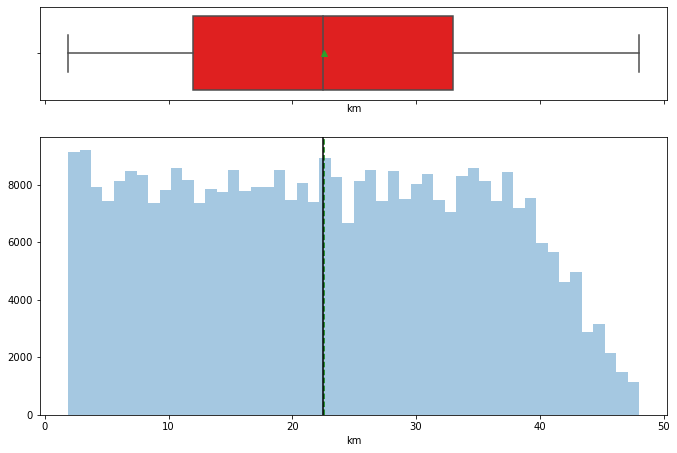

In [46]:
histogram_boxplot(df['km'])

#### Observations
- The graph is almost uniformly distributed, but towards the end it becomes slightly skewed. The amount of trips more than 40km decreases gradually.

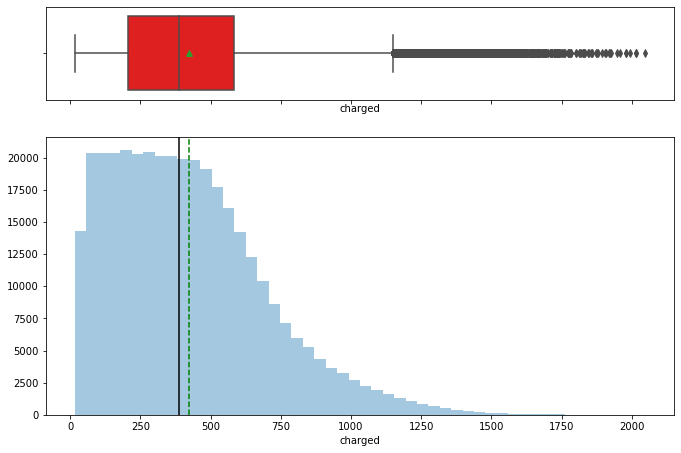

In [47]:
histogram_boxplot(df['charged'])

#### Observations
- The charged graph has a skewed distribution, but the initial part is mostly normally distributed. After \\$500 the frequenc drastically decreases all the way till \\$2000.
- There are also several outliers,

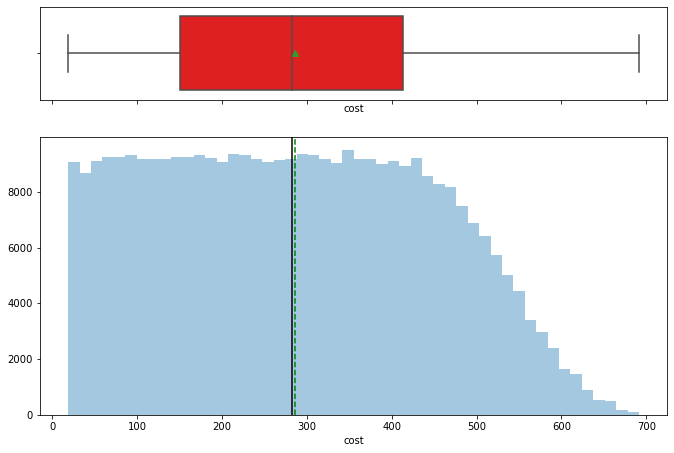

In [48]:
histogram_boxplot(df['cost'])

#### Observations
- The graph is uniform until around \\$450. Then it becomes more skewed.

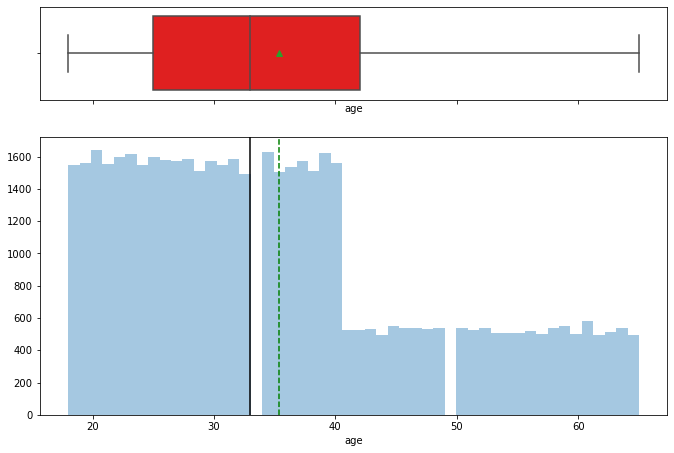

In [49]:
histogram_boxplot(customer['age'])

#### Observations
- The ages of customers are quite uniformly distributed. The only catch is that after age 40, the frequency of ages is much lower, but stays constant through age 60+.

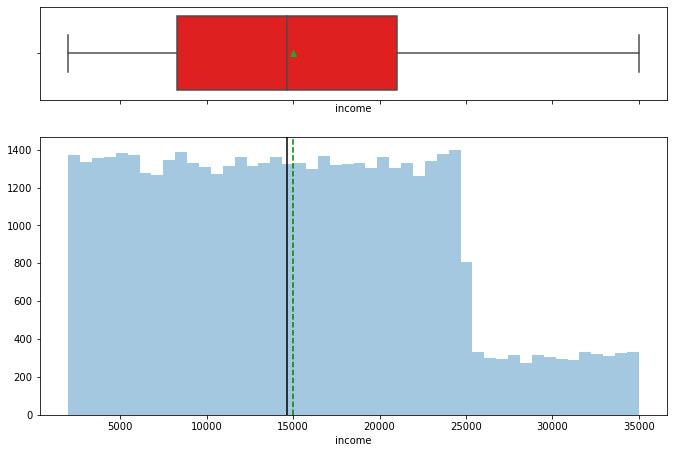

In [50]:
histogram_boxplot(customer['income'])

#### Observations
- Similar to age, the income distribution is also uniform and divided into two parts, with the change in frequency occurring at \\$25000.
- All incomes before \\$25000 has a frequency of around 1400 customers, while an average of 300 to 400 customers have incomes more than 25000.


In [51]:
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x-0.1, y+1.15), size = 14) # annotate the percantage

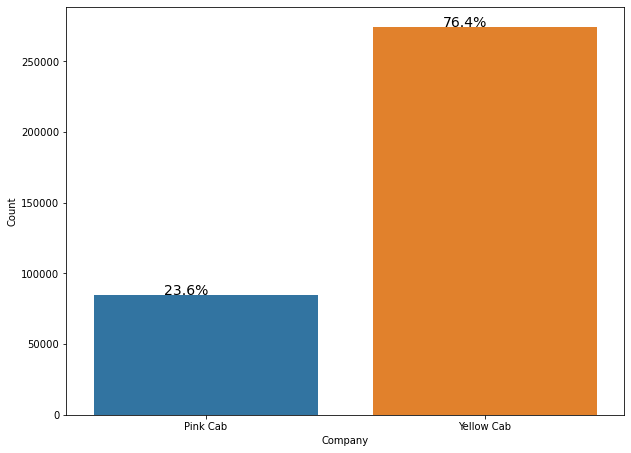

In [52]:
plt.figure(figsize=(10,7.5))
ax = sns.countplot(df['company'])
plt.xlabel('Company')
plt.ylabel('Count')
bar_perc(ax,df['company'])

#### Observations
- Yellow cab seems to have much larger share of the taxi market.
- One explanation could be that pink cabs are more expensive and are tailored for higher income audience. We will have to check this later.

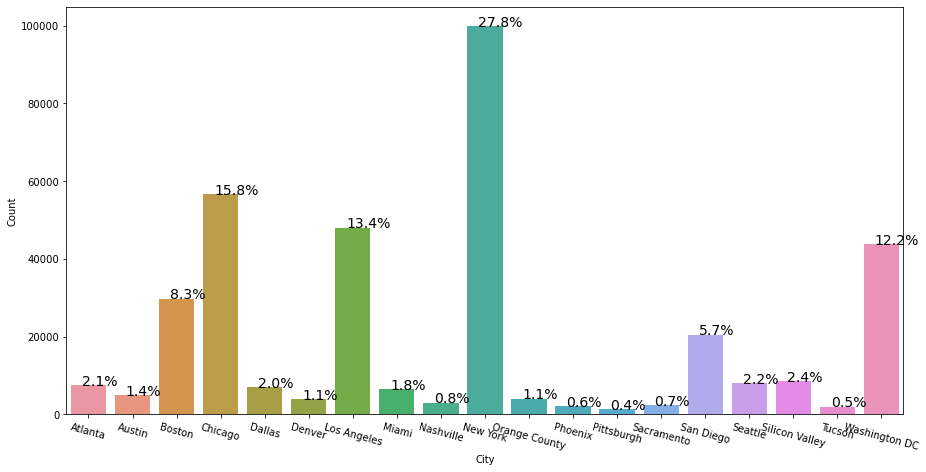

In [53]:
plt.figure(figsize=(15,7.5))
ax = sns.countplot(df['city'])
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=-15)
bar_perc(ax,df['city'])

#### Observations
- New York has the highest amount of trips with almost 30% of the market.
- Chicago and LA follow with 15.8% and 13.4%.

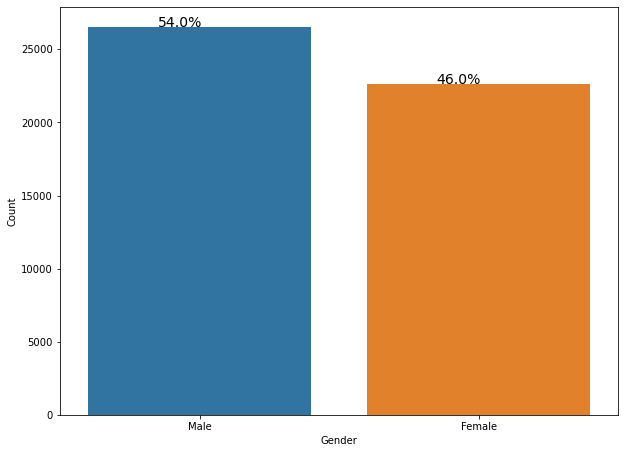

In [54]:
plt.figure(figsize=(10,7.5))
ax = sns.countplot(customer['gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
bar_perc(ax,customer['gender'])

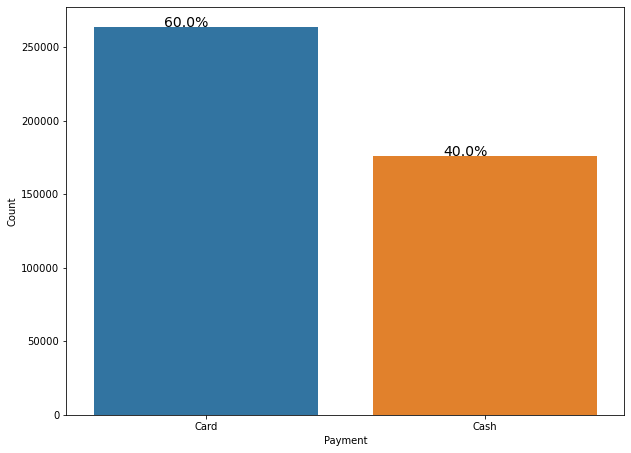

In [55]:
plt.figure(figsize=(10,7.5))
ax = sns.countplot(transaction['payment'])
plt.xlabel('Payment')
plt.ylabel('Count')
bar_perc(ax,transaction['payment'])

#### Observations
- More people tend to pay with card than cash

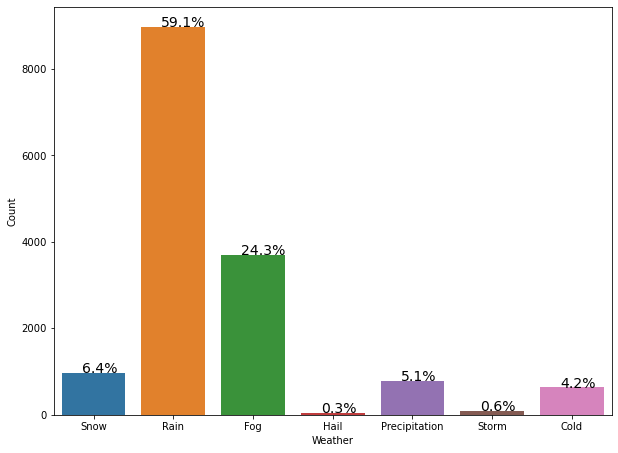

In [56]:
plt.figure(figsize=(10,7.5))
ax = sns.countplot(weather['Type'])
plt.xlabel('Weather')
plt.ylabel('Count')
bar_perc(ax,weather['Type'])

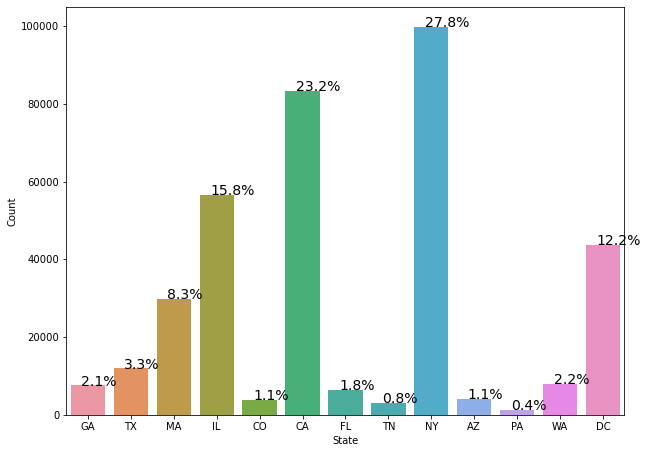

In [57]:
plt.figure(figsize=(10,7.5))
ax = sns.countplot(df['state'])
plt.xlabel('State')
plt.ylabel('Count')
bar_perc(ax,df['state'])

#### Observations
- New York followed by California have the highest number of taxi trips. 
- Illinois and Washington DC are third and fourth respectively with 15.8% and 12.2% of the market share.

# Hypotheses

The following are the hypotheses that I will investigate and attempt to answer.

- Number of taxi trips are same throughout each season.
- Average profit margin is same from city to city.
- Profits of both companies are the same.
- Company and income group of customers are independent.
- Length of trip and company are independent.
- Weather has no effect on choice of company.

### Hypothesis 1

H0: mean trips of each quarter is the same.<br>
H1: at least one pair of quarters have different mean trips.<br><Br>
This hypothesis will check to see if there is any seasonality or trend in the taxi trips per year - if the trips in each quarter are generally the same or different.

In [58]:
dates = df['date'].value_counts().sort_index().index
daily = df['date'].value_counts().sort_index().values

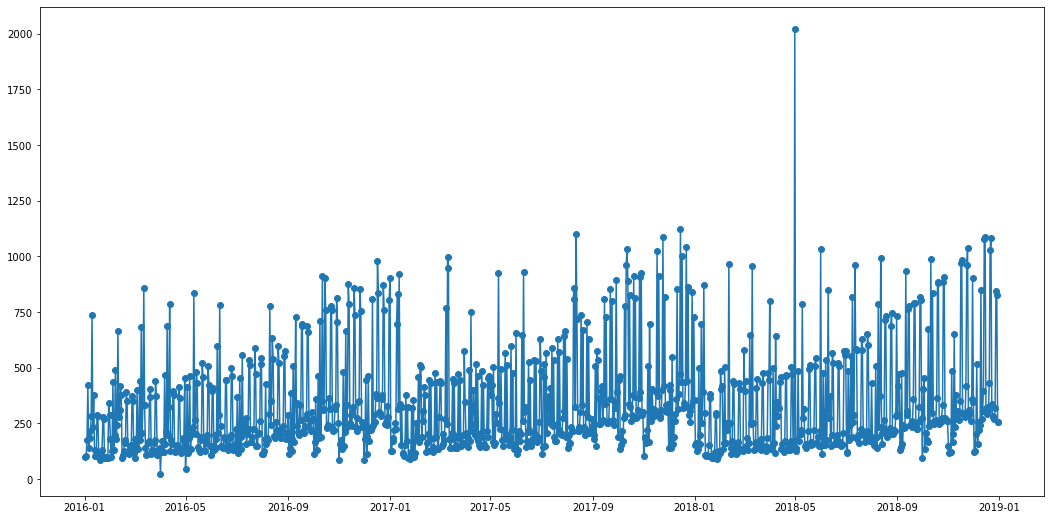

In [59]:
plt.figure(figsize=(18,9))
plt.plot_date(dates, daily, linestyle ='solid')

On a holistic picture, it does seem that there is a general trend over the 3 years. There seems to be a massive spike in trips somewhere in the middle of 2018. This will need to be investigated as this is almost 1000 extra trips. <br><br>
Overall, there is no doubt that there is a seasonality trend.

Now we will go deeper by dividing the graphs.

In [60]:
dates2016 = df[df['date']<'2017-01-01']['date'].value_counts().sort_index().index
daily2016 = df[df['date']<'2017-01-01']['date'].value_counts().sort_index().values

dates2017 = df[df['date']<'2018-01-01'][df['date']>'2016-12-31']['date'].value_counts().sort_index().index
daily2017 = df[df['date']<'2018-01-01'][df['date']>'2016-12-31']['date'].value_counts().sort_index().values

dates2018 = df[df['date']>'2017-12-31']['date'].value_counts().sort_index().index
daily2018 = df[df['date']>'2017-12-31']['date'].value_counts().sort_index().values

<ipython-input-60-e539ec5d2a38>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dates2017 = df[df['date']<'2018-01-01'][df['date']>'2016-12-31']['date'].value_counts().sort_index().index
<ipython-input-60-e539ec5d2a38>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  daily2017 = df[df['date']<'2018-01-01'][df['date']>'2016-12-31']['date'].value_counts().sort_index().values


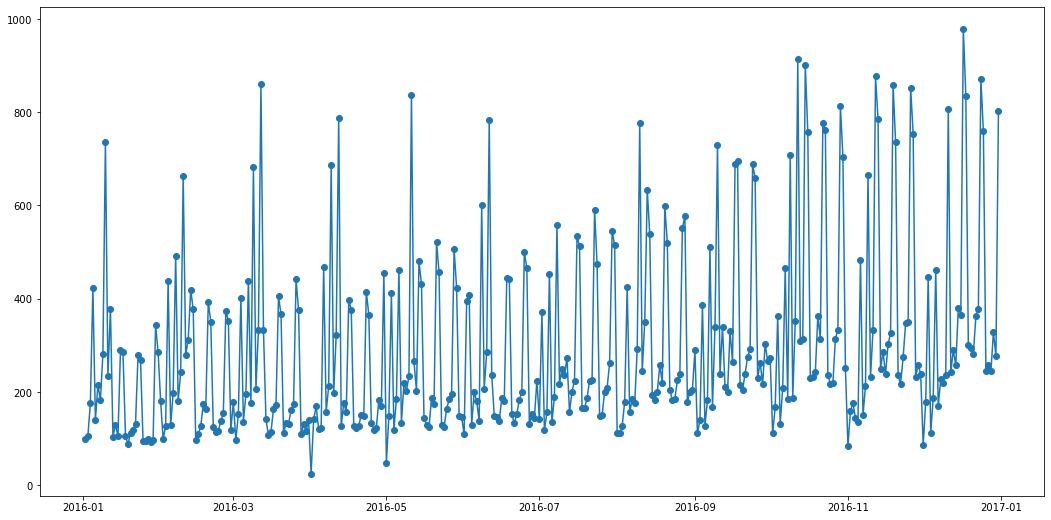

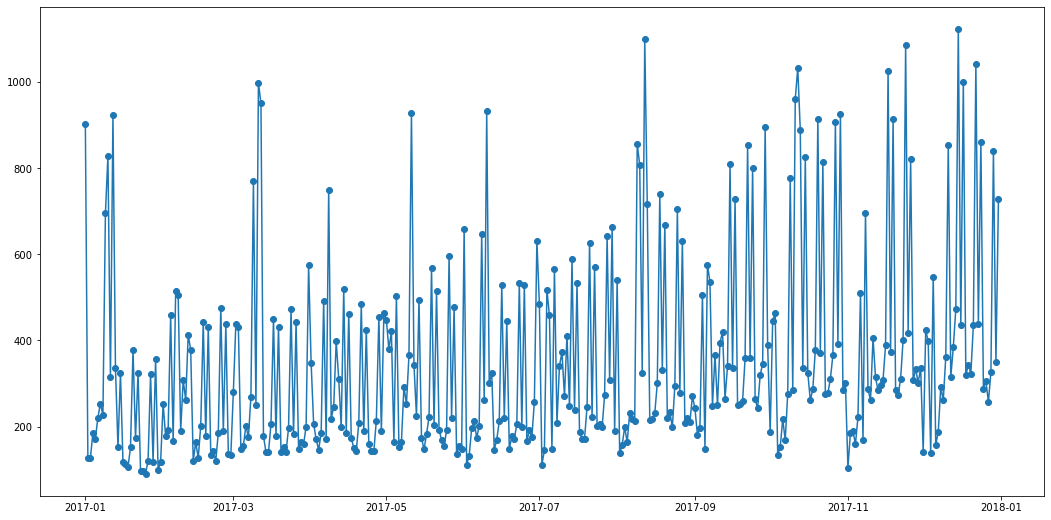

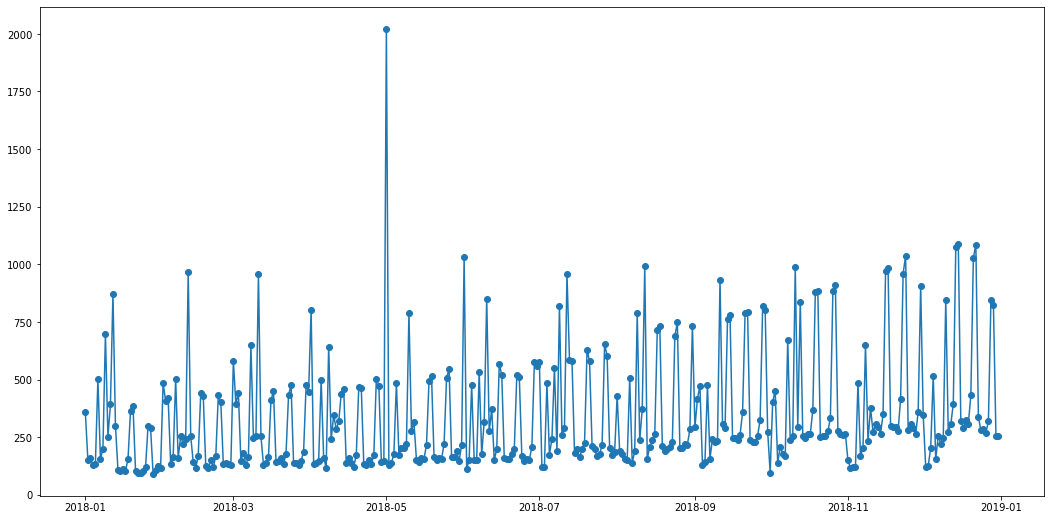

In [61]:
plt.figure(figsize=(18,9))
plt.plot_date(dates2016, daily2016, linestyle ='solid')
plt.show()
plt.figure(figsize=(18,9))
plt.plot_date(dates2017, daily2017, linestyle ='solid')
plt.show()
plt.figure(figsize=(18,9))
plt.plot_date(dates2018, daily2018, linestyle ='solid')
plt.show()

- The 3 years are very similar as noted previously.
- Across the span of each year, the trips very gradually increases.
- In each month, there also seems to be a trend.

Let's look a monthly graph.

In [62]:
dates20161 = df[df['date']<'2016-02-01']['date'].value_counts().sort_index().index
daily20161 = df[df['date']<'2016-02-01']['date'].value_counts().sort_index().values

dates20171 = df[df['date']>'2016-12-31'][df['date']<'2017-02-01']['date'].value_counts().sort_index().index
daily20171 = df[df['date']>'2016-12-31'][df['date']<'2017-02-01']['date'].value_counts().sort_index().values

dates20181 = df[df['date']>'2017-12-31'][df['date']<'2018-02-01']['date'].value_counts().sort_index().index
daily20181 = df[df['date']>'2017-12-31'][df['date']<'2018-02-01']['date'].value_counts().sort_index().values

<ipython-input-62-8a89a58d9a88>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dates20171 = df[df['date']>'2016-12-31'][df['date']<'2017-02-01']['date'].value_counts().sort_index().index
<ipython-input-62-8a89a58d9a88>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  daily20171 = df[df['date']>'2016-12-31'][df['date']<'2017-02-01']['date'].value_counts().sort_index().values
<ipython-input-62-8a89a58d9a88>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dates20181 = df[df['date']>'2017-12-31'][df['date']<'2018-02-01']['date'].value_counts().sort_index().index
<ipython-input-62-8a89a58d9a88>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  daily20181 = df[df['date']>'2017-12-31'][df['date']<'2018-02-01']['date'].value_counts().sort_index().values


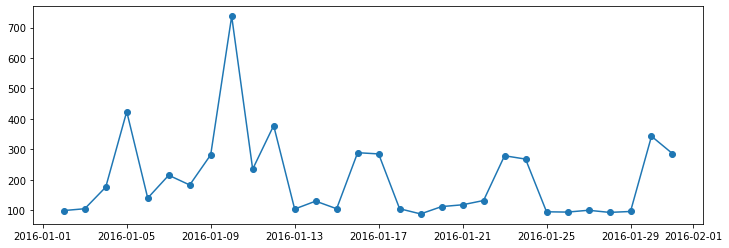

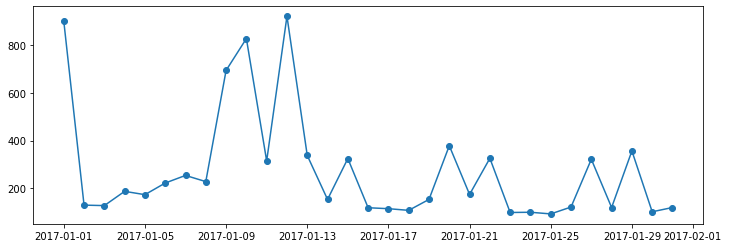

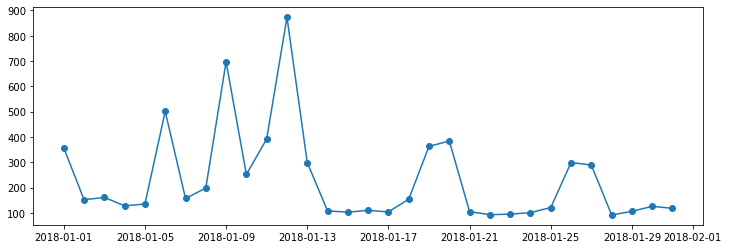

In [63]:
plt.figure(figsize=(12,4))
plt.plot_date(dates20161, daily20161, linestyle ='solid')
plt.show()
plt.figure(figsize=(12,4))
plt.plot_date(dates20171, daily20171, linestyle ='solid')
plt.show()
plt.figure(figsize=(12,4))
plt.plot_date(dates20181, daily20181, linestyle ='solid')
plt.show()

- We can see that on Jan 1 of 2017 there were many taxi rides, most likely due to New Year. On 2018 it is high also but not as much as 2017. 

In [64]:
dates20163 = df[df['date']>'2016-02-29'][df['date']<'2016-04-01']['date'].value_counts().sort_index().index
daily20163 = df[df['date']>'2016-02-29'][df['date']<'2016-04-01']['date'].value_counts().sort_index().values

dates20173 = df[df['date']>'2017-02-28'][df['date']<'2017-04-01']['date'].value_counts().sort_index().index
daily20173 = df[df['date']>'2017-02-28'][df['date']<'2017-04-01']['date'].value_counts().sort_index().values

dates20183 = df[df['date']>'2018-02-28'][df['date']<'2018-04-01']['date'].value_counts().sort_index().index
daily20183 = df[df['date']>'2018-02-28'][df['date']<'2018-04-01']['date'].value_counts().sort_index().values

<ipython-input-64-20e55948e63b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dates20163 = df[df['date']>'2016-02-29'][df['date']<'2016-04-01']['date'].value_counts().sort_index().index
<ipython-input-64-20e55948e63b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  daily20163 = df[df['date']>'2016-02-29'][df['date']<'2016-04-01']['date'].value_counts().sort_index().values
<ipython-input-64-20e55948e63b>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dates20173 = df[df['date']>'2017-02-28'][df['date']<'2017-04-01']['date'].value_counts().sort_index().index
<ipython-input-64-20e55948e63b>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  daily20173 = df[df['date']>'2017-02-28'][df['date']<'2017-04-01']['date'].value_counts().sort_index().values
<ipython-input-64-20e55948e63b>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d

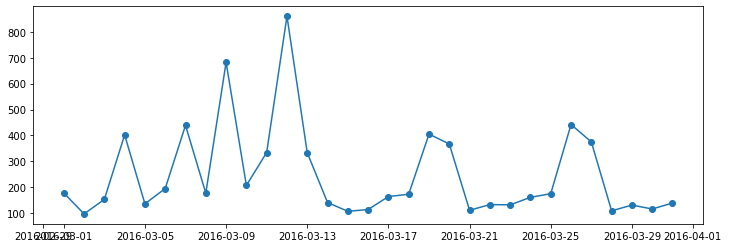

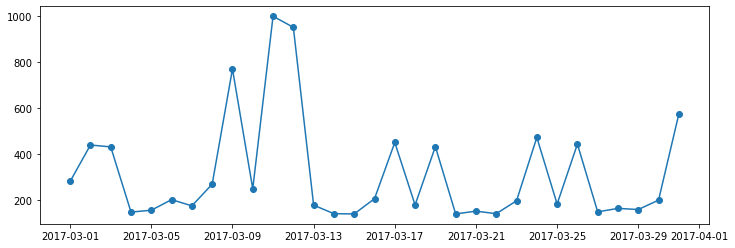

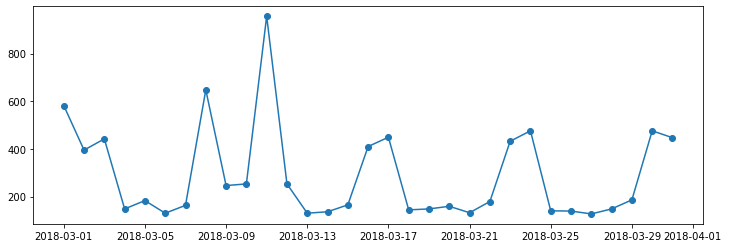

In [65]:
plt.figure(figsize=(12,4))
plt.plot_date(dates20163, daily20163, linestyle ='solid')
plt.show()
plt.figure(figsize=(12,4))
plt.plot_date(dates20173, daily20173, linestyle ='solid')
plt.show()
plt.figure(figsize=(12,4))
plt.plot_date(dates20183, daily20183, linestyle ='solid')
plt.show()

Not all months follow similar patterns each year, as can be seen with the month of January which had different patterns for each year. But other months such as March had almost a similar pattern.

In [66]:
dates20185 = df[df['date']>'2018-04-30'][df['date']<'2018-06-01']['date'].value_counts().sort_index().index
daily20185 = df[df['date']>'2018-04-30'][df['date']<'2018-06-01']['date'].value_counts().sort_index().values

<ipython-input-66-2361cf4b731c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dates20185 = df[df['date']>'2018-04-30'][df['date']<'2018-06-01']['date'].value_counts().sort_index().index
<ipython-input-66-2361cf4b731c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  daily20185 = df[df['date']>'2018-04-30'][df['date']<'2018-06-01']['date'].value_counts().sort_index().values


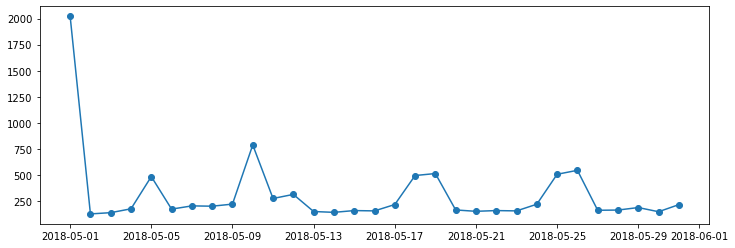

In [67]:
plt.figure(figsize=(12,4))
plt.plot_date(dates20185, daily20185, linestyle ='solid')
plt.show()

It is strange to have so many trips on May 1 2018. I was not able to find any special events on that day to explain this. Either some coincidence caused many people to need taxi rides, or many records had wrong dates, which seems unlikely to happen for so many records.

### Result

- The graphs clearly indicate that there is seasonality in the taxi rides, and that the number increases gradually throughout the year, and then drops at the start of the year (except for New Year)
- Thus, H0 is rejected.

### Hypothesis 2

H0: average profit margin of each city is the same.<br>
H1: average profit margins are different for at least one pair of cities. <br><br>
This hypothesis will check if the average profit margins are the same from city to city.<br>
I am assuming that the reason charged is greater than cost is because they are adding their profit margin. So the difference between charged and cost is the profit.

In [68]:
df['profit'] = df['charged'] - df['cost']

In [69]:
df[df['profit'] < 0]

,date,company,city,km,charged,cost,customer_id,payment,gender,age,income,state,weather,profit
86,2016-06-01,Pink Cab,Dallas,9.45,73.43,98.2800,25949,Card,Male,32,31491,TX,Light Rain,-24.8500
90,2016-11-01,Pink Cab,Dallas,4.90,35.76,49.4900,24086,Card,Male,60,19410,TX,Light Rain,-13.7300
91,2016-02-01,Pink Cab,Dallas,13.13,122.42,149.6820,25155,Card,Male,27,10997,TX,Moderate Fog,-27.2620
92,2016-02-01,Pink Cab,Dallas,33.32,308.58,386.5120,25247,Cash,Male,26,24178,TX,Moderate Fog,-77.9320
93,2016-11-01,Pink Cab,Dallas,4.52,38.31,52.8840,24530,Cash,Male,47,10312,TX,Light Rain,-14.5740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499089,2018-05-01,Yellow Cab,Washington DC,32.70,442.83,443.4120,52288,Cash,Male,64,14903,DC,Normal,-0.5820
499105,2018-07-01,Yellow Cab,Washington DC,8.19,113.32,114.9876,53475,Card,Female,36,18038,DC,Normal,-1.6676
499108,2018-07-01,Yellow Cab,Washington DC,5.55,78.43,78.5880,53147,Card,Male,22,11254,DC,Normal,-0.1580
499115,2018-06-01,Yellow Cab,Washington DC,47.20,653.09,668.3520,52010,Card,Male,19,23602,DC,Normal,-15.2620


- There are around 25000 trips where the charged is lower than the cost, so the profit value is negative. 
- One explanation I can think of is that the customer may have availed some sort of a discount or reduction in the cost, which resulted in this.

In [70]:
df.groupby('city')['profit'].mean().sort_values(ascending=False)

city
New York          279.947491
Dallas            160.856957
Silicon Valley    154.561013
Miami             117.493220
Orange County     114.766920
Atlanta           111.477158
Austin            107.577824
Denver            103.943793
Phoenix            93.479109
Los Angeles        91.847452
Washington DC      79.860762
San Diego          77.467955
Seattle            75.613962
Tucson             72.636300
Pittsburgh         64.863638
Chicago            59.820104
Boston             59.568883
Nashville          49.678478
Sacramento         49.567466
Name: profit, dtype: float64

- Straight away we see that the mean profit for each city is quite different. In New York it is extremely high. Other prominent cities such as Silcion Valley, Orange County and Miami also have profit margins on the higher side.
- The range of means is also quite large, even without considering New York.

In [71]:
df.groupby('city')['profit'].sum().sort_values(ascending=False)

city
New York          2.796256e+07
Los Angeles       4.411709e+06
Washington DC     3.492870e+06
Chicago           3.387313e+06
Boston            1.768719e+06
San Diego         1.587163e+06
Silicon Valley    1.316705e+06
Dallas            1.128733e+06
Atlanta           8.424329e+05
Miami             7.583012e+05
Seattle           6.046849e+05
Austin            5.267010e+05
Orange County     4.570019e+05
Denver            3.975850e+05
Phoenix           1.929409e+05
Nashville         1.495322e+05
Tucson            1.402607e+05
Sacramento        1.173262e+05
Pittsburgh        8.516596e+04
Name: profit, dtype: float64

- The total profits per city has a large range, which is obvious due to the different sizes and populations of the cities.
- There is a possibility that the profits may also depend on distance, so I will create a temporary column which takes profit per km, and check that.

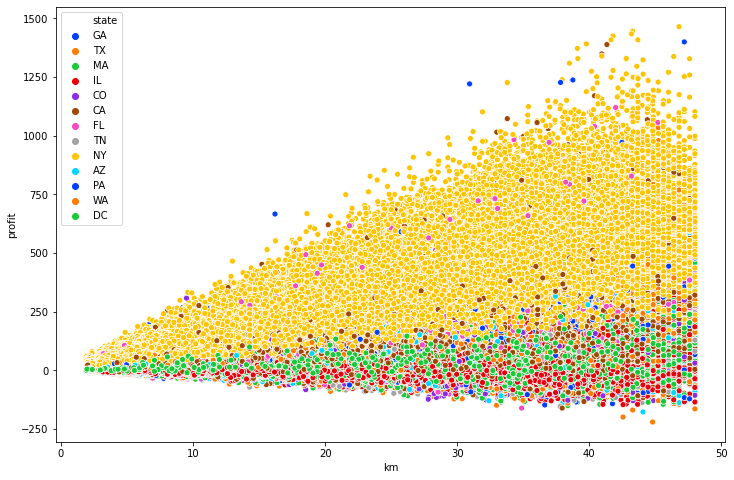

In [72]:
plt.figure(figsize=(12,8))
sns.scatterplot(df['km'], df['profit'], hue=df['state'], palette='bright')

- Clearly this shows that as the km increases, the variance in the profit increases linearly. There are many trips where the profit increases and many that has no change in profit.
- New York has the greatest variation in profit, and also the most of the higher profit margins as well. Other states like Illinois have lower profits even at high km. 

In [73]:
df['profit/km'] = df['profit'] / df['km']

In [74]:
df.groupby('city')['profit/km'].mean().sort_values(ascending=False)

city
New York          12.437591
Dallas             7.119055
Silicon Valley     6.752115
Miami              5.170861
Orange County      5.135902
Atlanta            5.006862
Austin             4.821304
Denver             4.620508
Phoenix            4.179977
Los Angeles        4.050952
Washington DC      3.521579
San Diego          3.437747
Seattle            3.345344
Tucson             3.202417
Pittsburgh         2.769356
Boston             2.638993
Chicago            2.638358
Nashville          2.173062
Sacramento         2.161169
Name: profit/km, dtype: float64

- The order seems to pretty much the same, so the distance doesn't seem to have an impact on the profits. This shows that New York does have very high profit margins regardless of the km travelled, as well as Dallas and Silicon Valley and the rest.

In [75]:
df.drop('profit/km', axis=1, inplace=True)

### Result
- Based on what we have seen, we can safely say that the profit margins are not the same for each city. 
- We also notice that even within the same city, the margins can differ based on km travelled, as well as other factors.
- The null hypothesis is rejected

### Hypothesis 3

H0: average profits for yellow cab is different to that of pink cab.<br>
H1: average profits for both companies are different.<br><br>
This hypothesis will check if the profit margins are different for each company.

<BarContainer object of 2 artists>

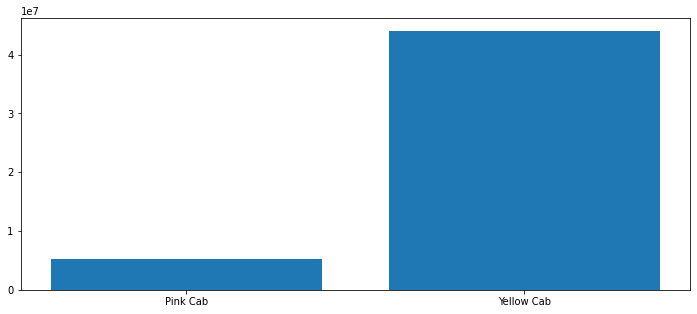

In [76]:
plt.figure(figsize=(12,5))
plt.bar(df.groupby('company')['profit'].sum().index, df.groupby('company')['profit'].sum().values)

In [77]:
df.groupby('company')['profit'].sum()

company
Pink Cab      5.307328e+06
Yellow Cab    4.402037e+07
Name: profit, dtype: float64

- This shows that yellow cab has made much more profit over the 3 year period than pink cab, almost \\$38m more.
- This is likely due to the larger market share, so we cannot rely on this number alone to determine the performance.

In [78]:
df.groupby('company')['profit'].mean()

company
Pink Cab       62.652174
Yellow Cab    160.259986
Name: profit, dtype: float64

The average profit is also higher, so yellow cab seems to charge more than pink cab.

In [79]:
df.groupby(['date','company'])['profit'].sum()

date        company   
2016-01-02  Pink Cab        253.3060
            Yellow Cab    17277.9400
2016-01-03  Pink Cab       1162.0560
            Yellow Cab    15587.6872
2016-01-04  Pink Cab       1641.6050
                             ...    
2018-12-29  Yellow Cab    98814.0764
2018-12-30  Pink Cab       4019.0560
            Yellow Cab    19574.0716
2018-12-31  Pink Cab       4444.1560
            Yellow Cab    17787.6068
Name: profit, Length: 2190, dtype: float64

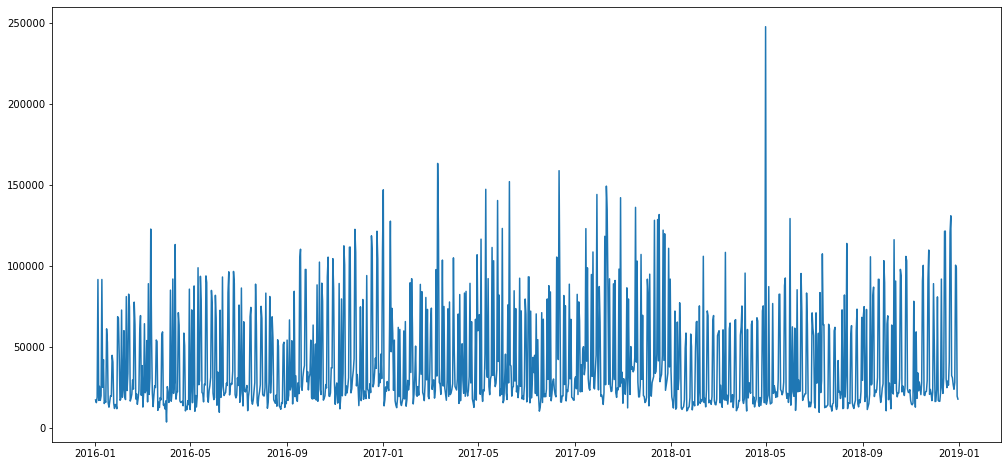

In [80]:
plt.figure(figsize=(17,8))
plt.plot(dates, df[df['company']=='Yellow Cab'].groupby('date')['profit'].sum().values, linestyle ='solid')
plt.show()

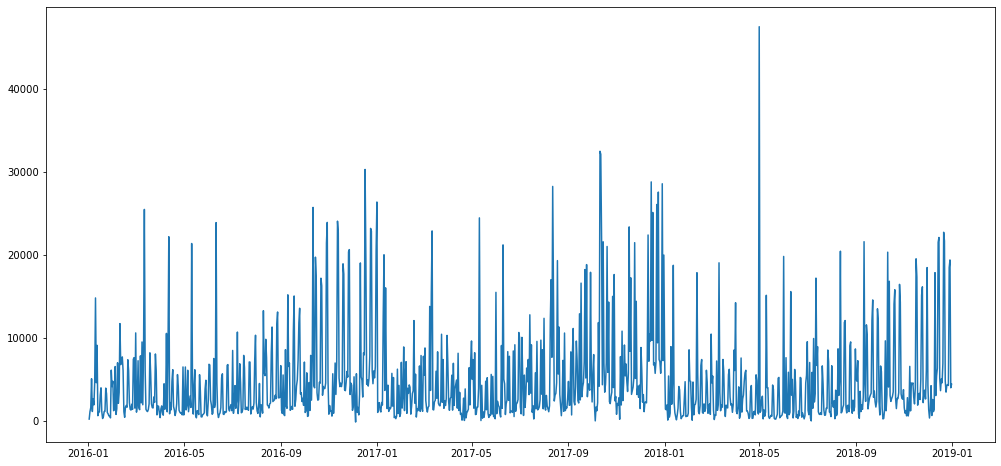

In [81]:
plt.figure(figsize=(17,8))
plt.plot(dates, df[df['company']=='Pink Cab'].groupby('date')['profit'].sum().values, linestyle ='solid')
plt.show()

In [82]:
df['year'] = df['date'].dt.year

In [83]:
df.groupby(['year', 'company'])['profit'].mean()

year  company   
2016  Pink Cab       68.321819
      Yellow Cab    169.347821
2017  Pink Cab       67.070839
      Yellow Cab    168.817057
2018  Pink Cab       53.229689
      Yellow Cab    143.416122
Name: profit, dtype: float64

- Over the 3 years, both companies seem to follow a yearly pattern, as can be seen in the graphs. 
- But in 2019, both companies' profits seem to slightly lower than the previous 2 years, as shown in the graphs as well as the groupby result.
- Therefore there is no indication of whether one company has improved their performance or not, based on these results.

### Result

Therefore, we can say that the profits of both companies are not the same. So this hypothesis is also rejected.<br> This brings us to our next hypothesis which will check for the income of customers

### Hypothesis 4

H0: mean income of customers is different for each company.<br>
H1: mean income is different for each company.<br><br>

This hypothesis will check if the taxi companies cater to different income groups of customers or not.

##### However, first we need to check if customers use the both companies or mainly just one company

In [84]:
df.groupby(['customer_id', 'company'])['company'].count()

customer_id  company   
1            Pink Cab       4
             Yellow Cab    25
2            Pink Cab       4
             Yellow Cab    36
3            Pink Cab       6
                           ..
59998        Yellow Cab     6
59999        Pink Cab       2
             Yellow Cab     6
60000        Pink Cab       4
             Yellow Cab    14
Name: company, Length: 72226, dtype: int64

In [85]:
df.customer_id.nunique()

46148

There are 72k rows, and only 46k customers. This means around 25k customers have used both companies, and therefore it would not mean much to check this hypothesis, as it will not give us any useful insights.

### Hypothesis 5

H0: mean km of both companies are same.<br>
H1: mean kms of both companies are different.<br><br>

Since customers tend to use both companies, let's check if the distance travelled has an effect on choice of cab.

In [86]:
df.groupby(['company', 'year'])['km'].mean()

company     year
Pink Cab    2016    22.468488
            2017    22.618763
            2018    22.577275
Yellow Cab  2016    22.616742
            2017    22.557303
            2018    22.541036
Name: km, dtype: float64

It seems like the average kms travelled is almost the same for each company, and also same per year.

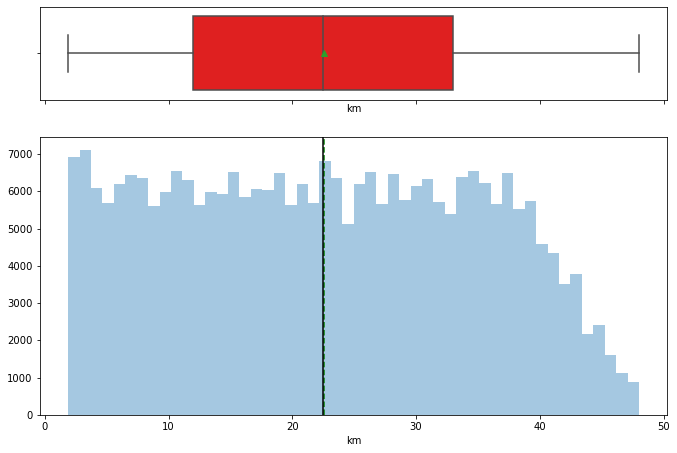

In [87]:
histogram_boxplot(df[df['company']=='Yellow Cab']['km'])

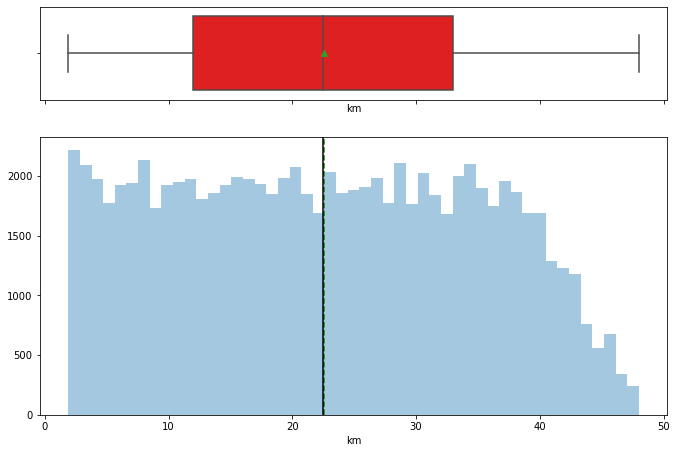

In [88]:
histogram_boxplot(df[df['company']=='Pink Cab']['km'])

The histograms are also very similar for both companies, just that yellow cabs have much more trips than pink cab.

### Results

The means are obviously almost the same, so we fail to reject the null hypothesis.

### Hypothesis 6

H0: trips in each weather type are same for both companies compared to normal conditions<br>
H1: trips are affected by weather for one company differently than for the other company.<br><br>
We will check if customers prefer a certain type of cab based on the weather.


In [89]:
group = df.groupby(['weather', 'company'])['weather']
group.count()

weather            company   
Heavy Rain         Pink Cab          61
                   Yellow Cab       240
Heavy Snow         Pink Cab          39
                   Yellow Cab       200
Light Rain         Pink Cab       17574
                   Yellow Cab     60194
Light Snow         Pink Cab        1733
                   Yellow Cab      7658
Moderate Fog       Pink Cab       11355
                   Yellow Cab     20549
Moderate Rain      Pink Cab         718
                   Yellow Cab      2258
Moderate Snow      Pink Cab         149
                   Yellow Cab       609
Normal             Pink Cab       44762
                   Yellow Cab    154521
Other Hail         Pink Cab          72
                   Yellow Cab       252
Severe Cold        Pink Cab        1868
                   Yellow Cab      3970
Severe Fog         Pink Cab        3477
                   Yellow Cab      6780
Severe Storm       Pink Cab          87
                   Yellow Cab       285
UNK Precip

In [90]:
i = 0
while i < len(df.groupby(['weather', 'company'])['weather'].count()):
    print(group.count().index[i][0])
    x = group.count()[i] / group.count()[i + 1]
    print(x)
    i += 2

Heavy Rain
0.25416666666666665
Heavy Snow
0.195
Light Rain
0.291956008904542
Light Snow
0.22629929485505354
Moderate Fog
0.5525816341427807
Moderate Rain
0.3179805137289637
Moderate Snow
0.24466338259441708
Normal
0.28968230855352994
Other Hail
0.2857142857142857
Severe Cold
0.47052896725440807
Severe Fog
0.5128318584070797
Severe Storm
0.30526315789473685
UNK Precipitation
0.1640547625983105


- So the ratio of pink to yellow cabs used during normal weahter is around 0.29. The ratios during other weather conditions also are around the same range, between 0.25 to 0.31, except for a few conditions.
- Among the exceptions are moderate fog, severe fog and severe cold, where the ratio is almost 0.5 for both. This almost feels like due to the conditions, the customers just wanted a cab and were willing to take whatever company's taxi was available.
- This theory is not evident in the case of severe storm or heavy rain, however.

### Result

Due to the few weather conditions that showed a large increase in use of pink taxis, which increased the ratio in question, we can say that the null hypothesis is rejected, and that some weather conditions do affect the customers' choice of cab.

# Further analysis

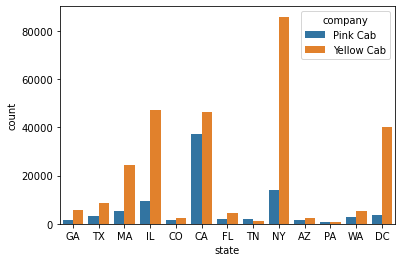

In [91]:
sns.countplot(df['state'], hue=df['company'])

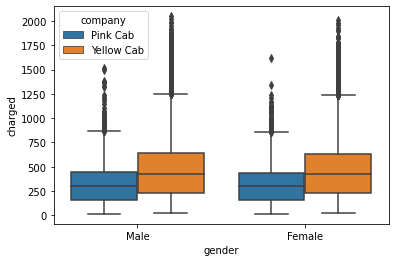

In [92]:
sns.boxplot(df['gender'], df['charged'], hue=df['company'])

# Recommendations

#### The recommendation after all the analyses and hypotheses is that XYZ firm should invest in the Yellow Cab company.

#### The reasons are as follows:
- The market share is dominated by Yellow cab, with around 76%.
- It has much higher profits than pink cab over the 3 years of data, regardless of the km travelled, time of year, customers etc.
- It has customers of all backgrounds and income groups. Regardless of their higher prices, customers still seem to flock to Yellow cab's services rather than pink cab.
- From the analyses conducted here, there has been no clear indicator as to why the high prices are not deterring the customers away. The only explanation would be that the quality of service is far better from Yellow Cab, that customers do not mind paying a bit more.

#### Some further insights

- Majority of customers are below 40 years and have income of 25000 and below.
- The gender of customers is fairly equally distributed.
- New York has the majority of taxi trips, unsurprisingly. It also has the highest profit margins.
- The taxi trips tend to increase gradually over the year, and then fall back slightly as the new year begins.
- New Year's day generally has a spike in taxi trip.